In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('train_dataset.csv')
answ=pd.read_csv('answers.csv')

In [3]:
df.head(10)

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y_label
0,11073,29076,636.353,235.061516,158.033619,1.487415,0.740272,29490,192.407674,0.693524,0.985961,0.902295,0.818542,0.008084,0.002239,0.670011,0.996584,DERMASON
1,13172,38091,755.186,271.077683,179.756984,1.508023,0.748513,38716,220.224811,0.706318,0.983857,0.839314,0.812405,0.007117,0.001912,0.660002,0.995298,DERMASON
2,11587,30969,651.527,230.164083,171.903953,1.338911,0.664964,31318,198.572293,0.733689,0.988856,0.916795,0.862742,0.007432,0.002540,0.744324,0.996584,DERMASON
3,12492,34589,685.425,253.001232,174.609358,1.448956,0.723664,34965,209.857291,0.784331,0.989246,0.925184,0.829471,0.007314,0.002136,0.688023,0.996915,DERMASON
4,430,35954,710.093,251.660769,182.014822,1.382639,0.690581,36380,213.958067,0.794564,0.988290,0.896038,0.850184,0.007000,0.002256,0.722814,0.999390,SEKER
5,13042,37342,716.591,265.585855,179.652361,1.478332,0.736500,37779,218.048873,0.705631,0.988433,0.913829,0.821011,0.007112,0.001993,0.674059,0.996483,DERMASON
6,2328,62298,992.583,327.685094,242.658033,1.350399,0.672032,63353,281.638558,0.801157,0.983347,0.794603,0.859479,0.005260,0.001771,0.738705,0.997546,BARBUNYA
7,13139,37904,723.594,261.498050,185.338663,1.410920,0.705452,38347,219.683572,0.709016,0.988448,0.909714,0.840096,0.006899,0.002120,0.705762,0.995774,DERMASON
8,8626,44028,781.776,289.058119,194.509971,1.486084,0.739725,44525,236.766110,0.713605,0.988838,0.905262,0.819095,0.006565,0.001823,0.670917,0.997039,SIRA
9,577,36851,699.211,240.537152,195.536548,1.230139,0.582381,37198,216.610596,0.768931,0.990672,0.947202,0.900529,0.006527,0.002648,0.810952,0.997584,SEKER


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10888 entries, 0 to 10887
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10888 non-null  int64  
 1   Area             10888 non-null  int64  
 2   Perimeter        10888 non-null  float64
 3   MajorAxisLength  10888 non-null  float64
 4   MinorAxisLength  10888 non-null  float64
 5   AspectRation     10888 non-null  float64
 6   Eccentricity     10888 non-null  float64
 7   ConvexArea       10888 non-null  int64  
 8   EquivDiameter    10888 non-null  float64
 9   Extent           10888 non-null  float64
 10  Solidity         10888 non-null  float64
 11  roundness        10888 non-null  float64
 12  Compactness      10888 non-null  float64
 13  ShapeFactor1     10888 non-null  float64
 14  ShapeFactor2     10888 non-null  float64
 15  ShapeFactor3     10888 non-null  float64
 16  ShapeFactor4     10888 non-null  float64
 17  y_label     

In [5]:
df.shape

(10888, 18)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Unnamed: 0         0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y_label            0
dtype: int64

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['y_label']= label_encoder.fit_transform(df['y_label'])

In [9]:
df.head()

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y_label
0,11073,29076,636.353,235.061516,158.033619,1.487415,0.740272,29490,192.407674,0.693524,0.985961,0.902295,0.818542,0.008084,0.002239,0.670011,0.996584,3
1,13172,38091,755.186,271.077683,179.756984,1.508023,0.748513,38716,220.224811,0.706318,0.983857,0.839314,0.812405,0.007117,0.001912,0.660002,0.995298,3
2,11587,30969,651.527,230.164083,171.903953,1.338911,0.664964,31318,198.572293,0.733689,0.988856,0.916795,0.862742,0.007432,0.002540,0.744324,0.996584,3
3,12492,34589,685.425,253.001232,174.609358,1.448956,0.723664,34965,209.857291,0.784331,0.989246,0.925184,0.829471,0.007314,0.002136,0.688023,0.996915,3
4,430,35954,710.093,251.660769,182.014822,1.382639,0.690581,36380,213.958067,0.794564,0.988290,0.896038,0.850184,0.007000,0.002256,0.722814,0.999390,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10888 entries, 0 to 10887
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10888 non-null  int64  
 1   Area             10888 non-null  int64  
 2   Perimeter        10888 non-null  float64
 3   MajorAxisLength  10888 non-null  float64
 4   MinorAxisLength  10888 non-null  float64
 5   AspectRation     10888 non-null  float64
 6   Eccentricity     10888 non-null  float64
 7   ConvexArea       10888 non-null  int64  
 8   EquivDiameter    10888 non-null  float64
 9   Extent           10888 non-null  float64
 10  Solidity         10888 non-null  float64
 11  roundness        10888 non-null  float64
 12  Compactness      10888 non-null  float64
 13  ShapeFactor1     10888 non-null  float64
 14  ShapeFactor2     10888 non-null  float64
 15  ShapeFactor3     10888 non-null  float64
 16  ShapeFactor4     10888 non-null  float64
 17  y_label     

In [11]:
df.y_label.value_counts()

3    2875
6    2100
5    1614
4    1520
2    1313
0    1061
1     405
Name: y_label, dtype: int64

In [12]:
df.drop('Unnamed: 0',axis='columns',inplace=True)
df.drop('ShapeFactor1',axis='columns',inplace=True)
df.drop('ShapeFactor2',axis='columns',inplace=True)
df.drop('ShapeFactor3',axis='columns',inplace=True)
df.drop('ShapeFactor4',axis='columns',inplace=True)

In [13]:
answ.drop('Unnamed: 0',axis='columns',inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10888 entries, 0 to 10887
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10888 non-null  int64  
 1   Perimeter        10888 non-null  float64
 2   MajorAxisLength  10888 non-null  float64
 3   MinorAxisLength  10888 non-null  float64
 4   AspectRation     10888 non-null  float64
 5   Eccentricity     10888 non-null  float64
 6   ConvexArea       10888 non-null  int64  
 7   EquivDiameter    10888 non-null  float64
 8   Extent           10888 non-null  float64
 9   Solidity         10888 non-null  float64
 10  roundness        10888 non-null  float64
 11  Compactness      10888 non-null  float64
 12  y_label          10888 non-null  int32  
dtypes: float64(10), int32(1), int64(2)
memory usage: 1.0 MB


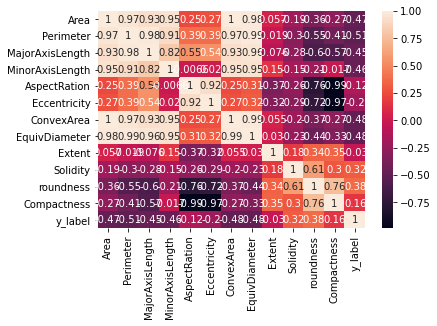

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
x = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values

In [17]:
x

array([[2.90760000e+04, 6.36353000e+02, 2.35061516e+02, ...,
        9.85961343e-01, 9.02294546e-01, 8.18541788e-01],
       [3.80910000e+04, 7.55186000e+02, 2.71077683e+02, ...,
        9.83856803e-01, 8.39313827e-01, 8.12404802e-01],
       [3.09690000e+04, 6.51527000e+02, 2.30164083e+02, ...,
        9.88856249e-01, 9.16794945e-01, 8.62742310e-01],
       ...,
       [9.00040000e+04, 1.15659900e+03, 4.56836383e+02, ...,
        9.91342659e-01, 8.45485278e-01, 7.41012068e-01],
       [3.84260000e+04, 7.11412000e+02, 2.46696608e+02, ...,
        9.90386350e-01, 9.54097306e-01, 8.96611840e-01],
       [6.36280000e+04, 9.97390000e+02, 4.00784151e+02, ...,
        9.89749094e-01, 8.03763198e-01, 7.10180357e-01]])

In [18]:
y

array([3, 3, 3, ..., 2, 5, 4])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='lbfgs', max_iter=5000)    
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [22]:
y_pred=classifier.predict(x_test)

In [23]:
y_pred=pd.DataFrame(y_pred)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

In [25]:
acc=accuracy_score(y_test, y_pred)

In [26]:
print(acc)

0.914401175606172


In [27]:
test=pd.read_csv('test_dataset.csv')

In [28]:
test.head()

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,1488,42339,741.226,260.199331,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383
1,2611,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352
2,749,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235
3,99,33143,648.385,222.526310,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465
4,11298,29925,647.570,237.714031,161.004848,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521


In [29]:
test.shape

(2723, 17)

In [30]:
test.drop('Unnamed: 0',axis='columns',inplace=True)
test.drop('ShapeFactor1',axis='columns',inplace=True)
test.drop('ShapeFactor2',axis='columns',inplace=True)
test.drop('ShapeFactor3',axis='columns',inplace=True)
test.drop('ShapeFactor4',axis='columns',inplace=True)

In [31]:
test=sc.transform(test)

In [32]:
filename = 'compitition_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))

In [34]:
result=loaded_model.predict(test)

In [35]:
result= pd.DataFrame(result)

In [36]:
result[0].value_counts()

3    657
6    563
5    410
4    403
2    324
0    249
1    117
Name: 0, dtype: int64

In [37]:
result = label_encoder.inverse_transform(result)

C:\Users\Fady\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [38]:
result= pd.DataFrame(result)

In [39]:
result[0].value_counts()

DERMASON    657
SIRA        563
SEKER       410
HOROZ       403
CALI        324
BARBUNYA    249
BOMBAY      117
Name: 0, dtype: int64

In [40]:
result.to_csv('Compitition_fra4at.csv', index=True)

In [41]:
print(accuracy_score(answ,result))

0.9184722732280572


## Kernel-SVM

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='poly', C=1)
scores = cross_val_score(clf, x_train, y_train, cv=5)

In [43]:
y_pred=classifier.predict(x_test) 

In [44]:
#y_pred=pd.DataFrame(y_pred)

In [45]:
acc=accuracy_score(y_test, y_pred)

In [46]:
acc

0.914401175606172

In [47]:
y_pred=pd.DataFrame(y_pred)

In [48]:
filename2 = 'compitition_model2.sav'
pickle.dump(classifier, open(filename2, 'wb'))

In [49]:
loaded_model2 = pickle.load(open(filename2, 'rb'))

In [50]:
result=loaded_model2.predict(test)

In [51]:
result= pd.DataFrame(result)

In [52]:
result[0].value_counts()

3    657
6    563
5    410
4    403
2    324
0    249
1    117
Name: 0, dtype: int64

## KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred=classifier.predict(x_test)

In [55]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       259
           1       1.00      1.00      1.00        99
           2       0.90      0.90      0.90       311
           3       0.92      0.92      0.92       738
           4       0.94      0.92      0.93       384
           5       0.93      0.96      0.94       423
           6       0.86      0.86      0.86       508

    accuracy                           0.91      2722
   macro avg       0.92      0.92      0.92      2722
weighted avg       0.91      0.91      0.91      2722



In [56]:
y_pred=pd.DataFrame(y_pred)

In [57]:
filename2 = 'compitition_model2.sav'
pickle.dump(classifier, open(filename2, 'wb'))

In [58]:
loaded_model2 = pickle.load(open(filename2, 'rb'))

In [59]:
result=loaded_model2.predict(test)

In [60]:
result= pd.DataFrame(result)

In [61]:
result[0].value_counts()

3    677
6    542
5    410
4    399
2    332
0    246
1    117
Name: 0, dtype: int64

In [62]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       259
           1       1.00      1.00      1.00        99
           2       0.90      0.90      0.90       311
           3       0.92      0.92      0.92       738
           4       0.94      0.92      0.93       384
           5       0.93      0.96      0.94       423
           6       0.86      0.86      0.86       508

    accuracy                           0.91      2722
   macro avg       0.92      0.92      0.92      2722
weighted avg       0.91      0.91      0.91      2722



## Naeive Base

In [63]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()   
classifier.fit(x_train,y_train)

GaussianNB()

In [64]:
y_pred=classifier.predict(x_test) 

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test , y_pred)

In [66]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       259
           1       0.99      1.00      0.99        99
           2       0.88      0.86      0.87       311
           3       0.94      0.87      0.90       738
           4       0.93      0.94      0.94       384
           5       0.92      0.95      0.94       423
           6       0.81      0.90      0.85       508

    accuracy                           0.89      2722
   macro avg       0.90      0.90      0.90      2722
weighted avg       0.90      0.89      0.90      2722



In [67]:
filename2 = 'compitition_model2.sav'
pickle.dump(classifier, open(filename2, 'wb'))

In [68]:
loaded_model2 = pickle.load(open(filename2, 'rb'))

In [69]:
result=loaded_model2.predict(test)

In [70]:
result= pd.DataFrame(result)

In [71]:
result[0].value_counts()

3    630
6    574
5    417
4    411
2    319
0    255
1    117
Name: 0, dtype: int64

In [72]:
result = label_encoder.inverse_transform(result)

C:\Users\Fady\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [73]:
result= pd.DataFrame(result)

In [74]:
print(accuracy_score(answ,result))

0.9008446566287184
